# Project on German credit database

**Project's issue**: 

The main idea is to challenge the traditional methods of classification and prediction of default with the
machine-learning methods already used in other financial intermediation institutions, especially in
startups. The comparison of the methods will be based on the usual performance's metrics. Logistic regression outcomes will be used as benchmark 
    
This project consists in building the best possible score function on a classic Machine-learning
database: the German Credit Data database.
This database has the distinction of being very small: it represents 1000 loans, 20 variables such as
marital status, age, number of credits to date, the amount requested. One of the advantages of this
database is that it contains the same type of information used in default risk assessment in most retail
banking establishments. However, the defect observation rate is very high (around 30%).

the Databasae can be find out using the following link :  http://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)


**Main results**

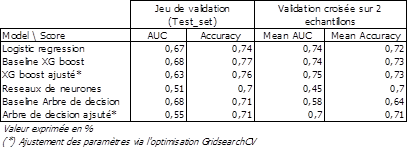

# Packages

In [16]:
import pandas as pd 
import numpy as np 
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accurasscy_score,confusion_matrix,roc_curve,classification_report,auc
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import tree
import tensorflow as tf 
import tensorflow.keras as keras 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import initializers

# Load dataset 

In [2]:
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
file = r'D:\sklearn\german.data'
df = pd.read_csv(file,names = names, delimiter = ' ')
df.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
df.describe()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [4]:
print("Data set shape", df.shape)

Data set shape (1000, 21)


# Data cleaning 

In [5]:
# classification variable transformation -> 0 = 'bad' credit; 1 = 'good' credit
df.classification.replace([1,2], [1,0], inplace=True)
# Nombre de 'good' credits  and 'bad credits
df.classification.value_counts()

1    700
0    300
Name: classification, dtype: int64

In [6]:
#numerical labels
numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']

#categorical labels 
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker'] 

In [7]:
#standardization of num labels
numdata_std = pd.DataFrame(StandardScaler().fit_transform(df[numvars].drop(['classification'], axis=1)))

In [8]:
#categorical codification
d = defaultdict(LabelEncoder)
lecatdf = df[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", df[catvars[x]].unique())
    print(catvars[x],": ", lecatdf[catvars[x]].unique())

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
employmentsince :  [4 2 3 0 1]
statussex :  ['A93' 'A92' 'A91' 'A94']
statussex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


In [9]:
#One hot encoding, num_var turned into binary variable
dummyvars = pd.get_dummies(df[catvars])

In [10]:
#clean databse 
data_clean = pd.concat([df[numvars], dummyvars], axis = 1)
print("German credit clean dataset", data_clean.head())
print("Clean dataset set shape", data_clean.shape )

German credit clean dataset    creditamount  duration  installmentrate  residencesince  age  \
0          1169         6                4               4   67   
1          5951        48                2               2   22   
2          2096        12                2               3   49   
3          7882        42                2               4   45   
4          4870        24                3               4   53   

   existingcredits  peopleliable  classification  existingchecking_A11  \
0                2             1               1                     1   
1                1             1               0                     0   
2                1             2               1                     0   
3                1             2               1                     1   
4                2             2               0                     1   

   existingchecking_A12  ...  housing_A152  housing_A153  job_A171  job_A172  \
0                     0  ...             1  

# Train and test dataset

In [11]:
#Train set validation set 
x= data_clean.drop('classification', axis=1)
y = data_clean['classification']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
y_test.value_counts()
y_train.value_counts()

x_train (750, 61)
x_test (250, 61)
y_train (750,)
y_test (250,)


1    524
0    226
Name: classification, dtype: int64

# Classification algorithms

# Functions

In [12]:
 #2 folds CV Evaluation fuuction
def evaluation(model,X,Y):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(model, X, Y, cv=2, scoring='accuracy')
    scores2 = cross_val_score(model, X, Y, cv=2, scoring='precision')
    scores3 = cross_val_score(model, X, Y, cv=2, scoring='recall')
    scores4 = cross_val_score(model, X, Y, cv=2, scoring='roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std()))
    return  

In [13]:
def compute_roc(y_true, y_pred, plot=True):
    fpr = dict()
    tpr = dict()
    auc_score = dict()
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    if plot:
        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, color='blue',
                 label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
        plt.legend(loc="upper right")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.show()
    return fpr, tpr, auc_score

In [68]:
#Baseline mlp model 
def mlp_model(init,learning_rate):   
    
    # Model initialisation and layers specification
    model = tf.keras.Sequential()
    model.add(Dense(61,input_dim=61,kernel_initializer=init, activation = 'relu'))
    model.add(Dense(1,kernel_initializer=init, activation='sigmoid'))
    
    # Initialisation of the optimizer
    adam = keras.optimizers.Adam(learning_rate=learning_rate)
    
    # Compile model 
    model.compile(loss=binary_crossentropy, optimizer=adam, metrics=['accuracy']) 
    return model

# Gradient boosting model
def xgboost(params, X_train, y_train,X_test, y_test):
    print('XGBoost v',xgb.__version__)
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    model = XGBClassifier(**params).\
      fit(X_train, y_train, eval_set=eval_set, \
                  eval_metric='auc', early_stopping_rounds = 100, verbose=100)
        
    print(model.best_ntree_limit)

    model.set_params(**{'n_estimators': model.best_ntree_limit})
    model.fit(X_train, y_train)
    print(model,'\n')
    
    # Predict target variables y for test data
    y_pred = model.predict(X_test, ntree_limit=model.best_ntree_limit) 
    print(y_pred)
   
    #Get Cross Validation and Confusion matrix
    evaluation(model, X_train, y_train)
    
    
    # Create and print confusion matrix    
    cfm = confusion_matrix(y_test,y_pred)
    print(cfm)
    
    print (classification_report(y_test,y_pred) )
    print ('\n')
    print ("XGBoost model Accuracy: %.6f" %accuracy_score(y_test,y_pred) )
    
    # ROC Curve
    print("ROC curve")
    compute_roc(y_test, y_pred, plot=True)
    
    return model



# fit, train and cross validate Logisitc regression with training and test data 
def logreg(X_train, y_train,X_test, y_test):
    print("LogisticRegression")
    model = LogisticRegression().fit(X_train, y_train)
    print(model,'\n')
    
    # Predict target variables y for test data
    y_pred = model.predict(X_test)
    
    print (classification_report(y_test,y_pred) )
    
    # Create and print confusion matrix 
    print("confusion matrix")
    cfm = confusion_matrix(y_test,y_pred)
    print(cfm)
    
    print ("Logistic model Accuracy: %.6f" %accuracy_score(y_test,y_pred) )
    
    # Create and print confusion matrix
    print("ROC curve")
    compute_roc(y_test, y_pred, plot=True)
    
    # Get Cross Validation and Confusion matrix on the test dataset
    evaluation(model, x_test, y_test)
    return 

# Tunning Hyperparameters with Gridsearch

In [51]:
print('MLP with grid search')
# Model creation with keras wrapper
estimator = KerasClassifier(build_fn=mlp_model,verbose=0)

# grid search epochs, batch size, learning_rate, initialiazer
batches = [100]
lr = [ 0.01, 0.001]
init = ['normal', 'uniform','glorot_uniform']
epochs = [10, 15]
param_grid = dict(epochs=epochs, learning_rate=lr, batch_size = batches, init = init)
grid = GridSearchCV(estimator, param_grid=param_grid,
                    return_train_score=False,
                    scoring='roc_auc',
                    verbose=False)

grid_result = grid.fit(x_train, y_train)

MLP with grid search


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [60]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.636286 using {'batch_size': 100, 'epochs': 15, 'init': 'normal', 'learning_rate': 0.01}
0.587585 (0.037005) with: {'batch_size': 100, 'epochs': 10, 'init': 'normal', 'learning_rate': 0.01}
0.593503 (0.017149) with: {'batch_size': 100, 'epochs': 10, 'init': 'normal', 'learning_rate': 0.001}
0.500882 (0.001248) with: {'batch_size': 100, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01}
0.555291 (0.051186) with: {'batch_size': 100, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.001}
0.548705 (0.035884) with: {'batch_size': 100, 'epochs': 10, 'init': 'glorot_uniform', 'learning_rate': 0.01}
0.479649 (0.029552) with: {'batch_size': 100, 'epochs': 10, 'init': 'glorot_uniform', 'learning_rate': 0.001}
0.636286 (0.061967) with: {'batch_size': 100, 'epochs': 15, 'init': 'normal', 'learning_rate': 0.01}
0.583906 (0.042502) with: {'batch_size': 100, 'epochs': 15, 'init': 'normal', 'learning_rate': 0.001}
0.472264 (0.007255) with: {'batch_size': 100, 'epochs': 15, 'init': 'unifo

In [31]:
#Tunning Decision tree model  With Gridsearch
print('Decision tree with Classifier')
params={'max_depth': np.arange(2, 15)}
tree_estimator = tree.DecisionTreeClassifier()

grid_tree = GridSearchCV(tree_estimator, params, cv=2, scoring="accuracy",
                         n_jobs=1,
                         verbose=False)

grid_tree.fit(x_train, y_train)
best_est = grid_tree.best_estimator_
print(best_est)
print(grid_tree.best_score_)


# summarize results
print("Best: %f using %s" % (grid_tree.best_score_, grid_tree.best_params_))
means = grid_tree.cv_results_['mean_test_score']
stds = grid_tree.cv_results_['std_test_score']
params = grid_tree.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Decision tree with Classifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.7066666666666667
Best: 0.706667 using {'max_depth': 3}
0.700000 (0.001333) with: {'max_depth': 2}
0.706667 (0.013333) with: {'max_depth': 3}
0.688000 (0.013333) with: {'max_depth': 4}
0.664000 (0.037333) with: {'max_depth': 5}
0.700000 (0.004000) with: {'max_depth': 6}
0.684000 (0.014667) with: {'max_depth': 7}
0.677333 (0.016000) with: {'max_depth': 8}
0.680000 (0.013333) with: {'max_depth': 9}
0.676000 (0.001333) with: {'max_depth': 10}
0.684000 (0.004000) with: {'max_depth': 11}
0.677333 (0.002667) with: {'max_depth': 12}
0.696000 (0.000000) with: {'max_dep

In [79]:
print('XGBoost with grid search')
params={
    'learning_rate': [0.01, 0.02],
    'max_depth': [3],
    #'subsample': [0.6]
    #'colsample_bytree': [0.5],
    'n_estimators': [50, 100, 200, 300, 400, 500]
    #'reg_alpha': [0.03] #[0.01, 0.02, 0.03, 0.04]
}


estimator = xgb.XGBClassifier()

grid_xgb = GridSearchCV(estimator,
                  params,
                  cv=2,
                  scoring="roc_auc",
                  n_jobs=1,
                  verbose=False)
grid_xgb.fit(x_train, y_train)
best_est = grid_xgb.best_estimator_
print(best_est)
print(grid_xgb.best_score_)

print('Cross validation of Gridsearch best estimator')
evaluation(best_est,x_test,y_test)

XGBoost with grid search
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
0.7710008106464905
Roc AUC with test data of Gridsearch best estimator
0.7645116707616708
Cross validation of Gridsearch best estimator
Cross Validation Accuracy: 0.73 (+/- 0.00)
Cross Validation Precision: 0.78 (+/- 0.01)
Cross Validation Recall: 0.85 (+/- 0.01)
Cross Validation roc_auc: 0.76 (+/- 0.04)


# Model implementation

LogisticRegression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

              precision    recall  f1-score   support

           0       0.57      0.49      0.53        74
           1       0.80      0.85      0.82       176

    accuracy                           0.74       250
   macro avg       0.68      0.67      0.67       250
weighted avg       0.73      0.74      0.73       250

confusion matrix
[[ 36  38]
 [ 27 149]]
Logistic model Accuracy: 0.740000
ROC curve


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


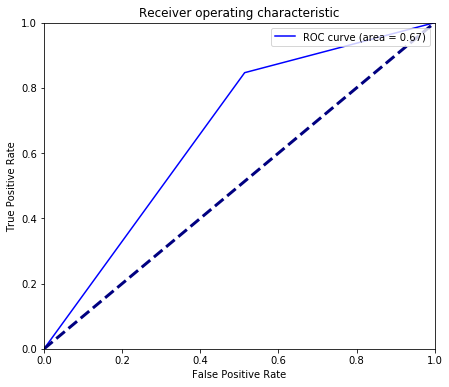

Cross Validation Accuracy: 0.72 (+/- 0.02)
Cross Validation Precision: 0.80 (+/- 0.01)
Cross Validation Recall: 0.80 (+/- 0.01)
Cross Validation roc_auc: 0.74 (+/- 0.05)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [69]:
# Logistic Regression
logreg(x_train, y_train,x_test,y_test)

ROC curve


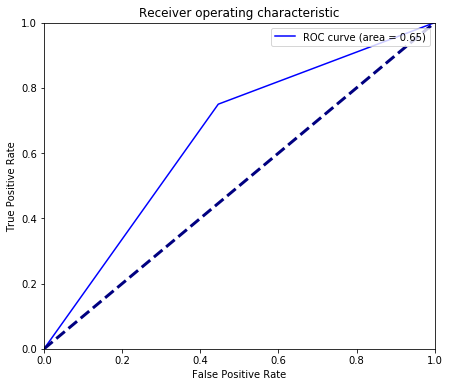

Decision tree model Accuracy: 0.692000
confusion matrix
[[ 41  33]
 [ 44 132]]
Cross Validation Accuracy: 0.64 (+/- 0.00)
Cross Validation Precision: 0.75 (+/- 0.01)
Cross Validation Recall: 0.80 (+/- 0.03)
Cross Validation roc_auc: 0.58 (+/- 0.02)


In [72]:
#Decison tree baseline model
model = tree.DecisionTreeClassifier()
#Fitting Decison tree baseline model
model.fit(x_train,y_train)
#Predict target variables y for test data
y_pred = model.predict(x_test) 
#Create and print confusion matrix
print("ROC curve")
compute_roc(y_test, y_pred, plot=True)
cfm = confusion_matrix(y_test,y_pred)
print ("Decision tree model Accuracy: %.6f" %accuracy_score(y_test,y_pred))
print("confusion matrix")
print(cfm)
evaluation(model,x_test,y_test)

ROC curve
Decison tree model Accuracy: 0.708000


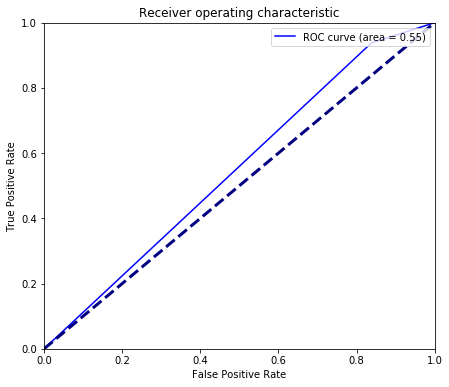

Decision tree model Accuracy: 0.708000
confusion matrix
[[ 12  62]
 [ 11 165]]
Cross Validation Accuracy: 0.70 (+/- 0.00)
Cross Validation Precision: 0.78 (+/- 0.07)
Cross Validation Recall: 0.84 (+/- 0.14)
Cross Validation roc_auc: 0.71 (+/- 0.01)


In [73]:
model = tree.DecisionTreeClassifier(max_depth = 3)
#Fitting Decison tree baseline model
model.fit(x_train,y_train)
# Predict target variables y for test data
y_pred = model.predict(x_test) 
# Create and print confusion matrix
print("ROC curve")
print ("Decison tree model Accuracy: %.6f" %accuracy_score(y_test,y_pred) )
compute_roc(y_test, y_pred, plot=True)
cfm = confusion_matrix(y_test,y_pred)
print ("Decision tree model Accuracy: %.6f" %accuracy_score(y_test,y_pred))
print("confusion matrix")
print(cfm)
evaluation(model,x_test,y_test)

Scorer: make_scorer(roc_auc_score, needs_threshold=True)
Best_score: 0.63629
Score on the test set: 0.70400
Cross validation of Gridsearch best estimator
Cross Validation Accuracy: 0.70 (+/- 0.04)
Cross Validation Precision: 0.76 (+/- 0.01)
Cross Validation Recall: 0.90 (+/- 0.10)
Cross Validation roc_auc: 0.45 (+/- 0.04)


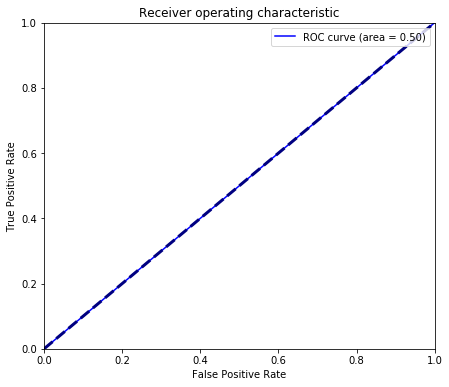

(array([0., 1.]), array([0., 1.]), 0.5)

In [64]:
#MLP implementation 
best_pipe = grid_result.best_estimator_
print('Scorer:' , grid_result.scorer_)
print('Best_score: %.5f' % grid_result.best_score_)
y_pred = best_pipe.predict(x_test)
#print(y_pred)
score = best_pipe.score(x_test, y_test)
print('Score on the test set: %.5f' %  score)
print('Cross validation of Gridsearch best estimator')
evaluation(best_pipe,x_test,y_test)
compute_roc(y_test, y_pred, plot=True)

XGBoost v 1.0.2
[0]	validation_0-auc:0.82772	validation_1-auc:0.73772
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:1.00000	validation_1-auc:0.73833
5
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None) 

[0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1

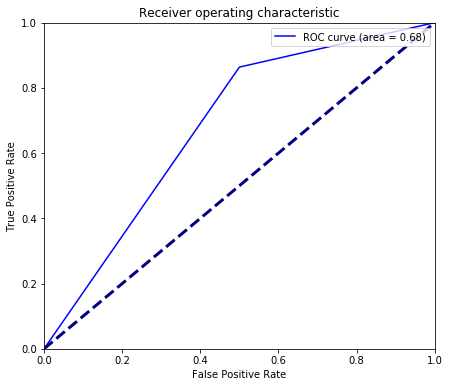

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [58]:
#Xgboost implementation 
params={}
xgboost(params, x_train, y_train, x_test, y_test)

XGBoost v 1.0.2
[0]	validation_0-auc:0.74884	validation_1-auc:0.69487
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.84272	validation_1-auc:0.76827
[200]	validation_0-auc:0.87411	validation_1-auc:0.77046
Stopping. Best iteration:
[170]	validation_0-auc:0.86610	validation_1-auc:0.77277

171
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=171, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             

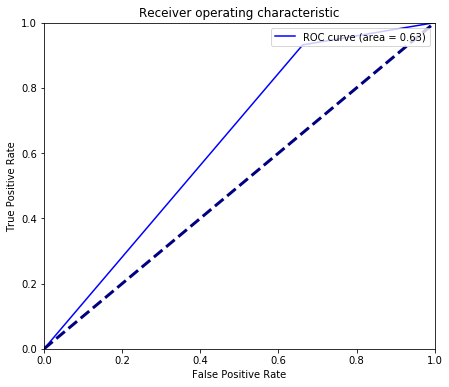

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=171, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [54]:
params= {'learning_rate':0.01, 'max_depth':3,'n_estimators':500}
xgboost(params, x_train, y_train, x_test, y_test)